In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('data/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.isnull()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
data['Price'].max()

np.float64(2469065.5941747027)

In [9]:
data['Avg. Area Income'].max()

np.float64(107701.74837763936)

In [10]:
data['Price'].min()

np.float64(15938.657923287848)

In [11]:
x=data['Avg. Area Income'].values
y=data['Price'].values
resultats=pd.DataFrame({'Avg.Area Income': x ,'Price': y})

In [12]:
resultats

,Avg.Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [13]:
x

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367], shape=(5000,))

In [14]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

In [15]:
x=data.iloc[ : ,1:2].values
y=data.iloc[ : ,5:6].values

In [16]:
x

array([[5.68286132],
       [6.00289981],
       [5.86588984],
       ...,
       [7.25059061],
       [5.53438842],
       [5.99230531]], shape=(5000, 1))

In [17]:
y=y[ :, -1]

In [18]:
# x_train,x_test,y_train,y_test
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

print("x_train Shape:", x_train.shape)
print("x_test Shape:", x_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:",y_test.shape) 


x_train Shape: (3750, 1)
x_test Shape: (1250, 1)
y_train Shape: (3750,)
y_test Shape: (1250,)


In [29]:
# importer l'algorithme de la regression linear
from sklearn.linear_model import LinearRegression

In [31]:
modele_lineaire= LinearRegression()

In [32]:
# entrainement du modele
modele_lineaire.fit(x_train,y_train)

LinearRegression()

In [33]:
# la prediction
modele_lineaire.predict(x_test)

array([1310724.4942807 , 1174083.39529352, 1527107.89999146, ...,
       1218142.51083138, 1154230.33304394,  915926.71282952],
      shape=(1250,))

In [35]:
y_price_predicts=modele_lineaire.predict(x_test)

In [36]:
print(y_price_predicts)

[1310724.4942807  1174083.39529352 1527107.89999146 ... 1218142.51083138
 1154230.33304394  915926.71282952]


In [37]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [38]:
resultats=pd.DataFrame(y_test,y_price_predicts)
resultats

,0
1.310724e+06,1.435770e+06
1.174083e+06,1.668448e+06
1.527108e+06,1.762215e+06
1.062004e+06,1.106261e+06
1.340886e+06,1.051124e+06
...,...
1.234119e+06,7.054441e+05
1.143195e+06,1.358647e+06
1.218143e+06,9.750058e+05
1.154230e+06,1.393996e+06


In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
print("MES de la regression linear :",mean_squared_error(y_test,y_price_predicts))

MES de la regression linear : 98127200337.12032


In [41]:
print("r2 score de la regression lineaire ;",r2_score(y_test,y_price_predicts))

r2 score de la regression lineaire ; 0.20938424445173554


In [42]:
import matplotlib.pyplot as plt

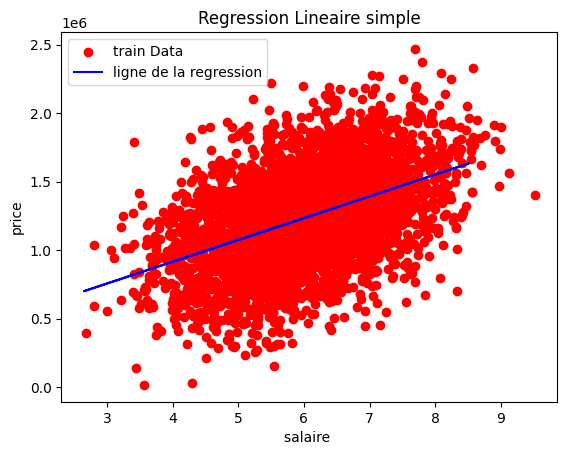

In [46]:
plt.scatter(x_train, y_train, color='red', label='train Data')
plt.plot(x_test,y_price_predicts,color = 'blue', label = 'ligne de la regression')
plt.xlabel("salaire ")
plt.ylabel("price")
plt.title("Regression Lineaire simple")
plt.legend()
plt.show()
